### ***IMPORT REQUIRED LIBRARIES***

We begin by importing essential Python libraries for data processing, visualization, and model building.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

### ***Load and Explore the Breast Cancer Dataset***

The dataset is loaded from Scikit-learn's datasets module.

In [2]:
# Load breast cancer dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Print dataset details
print(breast_cancer_dataset)


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

The dataset contains:

- 569 samples

- 30 features

- A target variable (0 = Malignant, 1 = Benign)


### ***Convert Data into a Pandas DataFrame***

In [3]:
# Convert dataset into a Pandas DataFrame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

# Add target labels
data_frame["label"] = breast_cancer_dataset.target

In [4]:
# Display the last few rows
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### ***Exploratory Data Analysis (EDA)***

We analyze the dataset's structure, check for missing values, and visualize key statistics.

In [5]:
# Print dataset shape
print("Dataset Shape:", data_frame.shape)

Dataset Shape: (569, 31)


In [6]:
# Get dataset information
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Check for missing values
print("Missing Values in Dataset:")
print(data_frame.isnull().sum())

Missing Values in Dataset:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64


In [8]:
# Get statistical summary
print("Summary Statistics:")
data_frame.describe()

Summary Statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Visualizing the Distribution of the Target Variable**

<ipython-input-9-d19af690b5b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_frame["label"], palette="coolwarm")


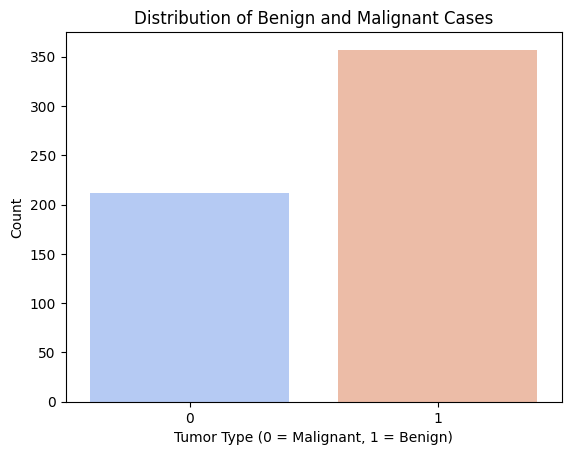

In [9]:
# Count the number of malignant (0) and benign (1) cases
sns.countplot(x=data_frame["label"], palette="coolwarm")
plt.title("Distribution of Benign and Malignant Cases")
plt.xlabel("Tumor Type (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()

**Observation:**

The dataset is imbalanced (more benign cases than malignant). This can affect the model's learning ability, as it may become biased toward predicting the majority class.

**Handling Class Imbalance with SMOTE (Synthetic Minority Over-sampling Technique)**

In [10]:
# Splitting features and target variable
X = data_frame.drop(columns="label", axis=1)
Y = data_frame["label"]

In [11]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

<ipython-input-12-3431595bade2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_resampled, palette="coolwarm")


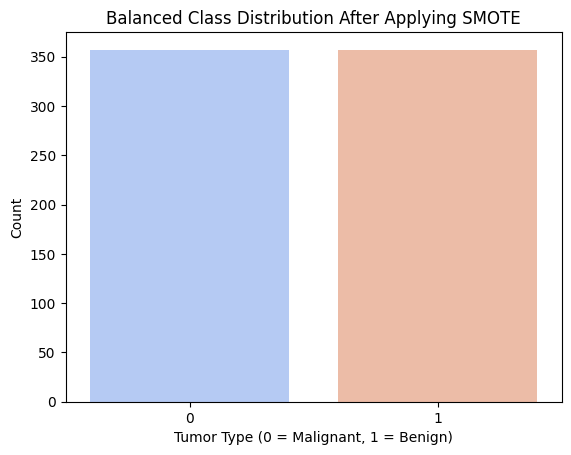

In [12]:
# Check the new distribution
sns.countplot(x=Y_resampled, palette="coolwarm")
plt.title("Balanced Class Distribution After Applying SMOTE")
plt.xlabel("Tumor Type (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()

In [13]:
# Display numerical count
print("Balanced class distribution:", Counter(Y_resampled))

Balanced class distribution: Counter({0: 357, 1: 357})


*Now the dataset is balanced, ensuring that the model does not become biased toward predicting the benign class.*

### ***Splitting Data into Training and Testing Sets***

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=2)

# Print the shape of train and test data
print("Data Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Y_train:", Y_train.shape, "Y_test:", Y_test.shape)


Data Shapes:
X_train: (571, 30) X_test: (143, 30)
Y_train: (571,) Y_test: (143,)


### ***Feature Scaling (Standardization for Neural Network)***

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


### ***Building the Neural Network Model***

In [16]:
import tensorflow as tf
from tensorflow import keras

# Set random seed for reproducibility
tf.random.set_seed(3)

# Define the Neural Network Architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),  # Input layer
    keras.layers.Dense(20, activation="relu"),  # Hidden layer with 20 neurons
    keras.layers.Dense(2, activation="sigmoid")  # Output layer (Binary Classification)
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.8742 - loss: 0.3692 - val_accuracy: 0.9655 - val_loss: 0.2143
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9148 - loss: 0.2631 - val_accuracy: 0.9655 - val_loss: 0.1698
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9343 - loss: 0.2096 - val_accuracy: 0.9655 - val_loss: 0.1434
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9519 - loss: 0.1772 - val_accuracy: 0.9655 - val_loss: 0.1249
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9521 - loss: 0.1538 - val_accuracy: 0.9655 - val_loss: 0.1106
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9624 - loss: 0.1362 - val_accuracy: 0.9655 - val_loss: 0.0994
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9711 - loss: 0.1230 - val_accuracy: 0.9655 - val_loss: 0.0907
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9729 - loss: 0.1127 - val_accuracy: 0.9655 - val_lo

***Visualizing Model Performance***

Visualize Training Loss

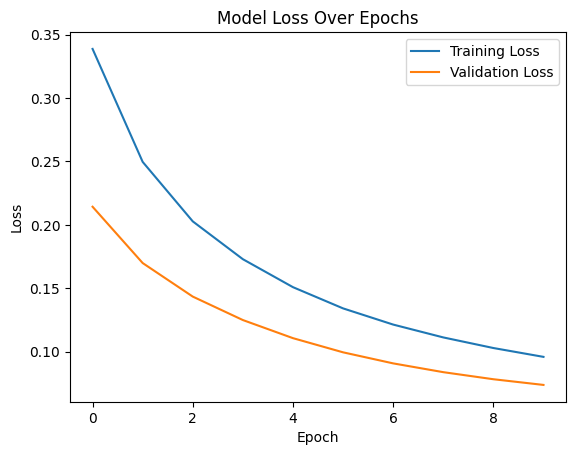

In [17]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss Over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Visualize Training Accuracy

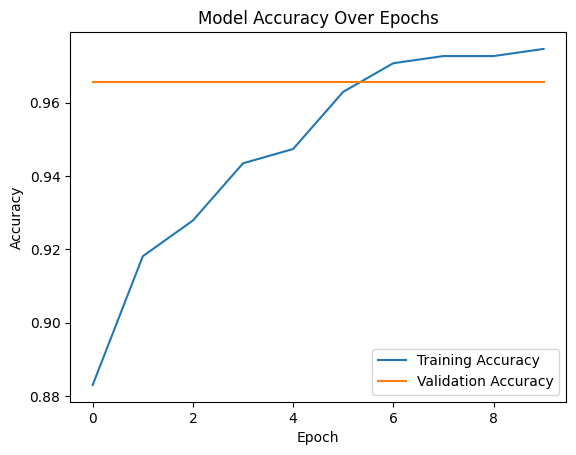

In [18]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

### ***Evaluate the Model on Test Data***

In [19]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9620 - loss: 0.1495
Final Model Accuracy: 95.10%


### ***Making Predictions on Test Data***

In [20]:
# Make predictions on test data
y_pred = model.predict(X_test_std)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [21]:
y_pred

array([[4.11208779e-01, 6.34588242e-01],
       [5.00748336e-01, 7.51088979e-03],
       [5.64126313e-01, 4.95113023e-02],
       [2.60160029e-01, 8.19718421e-01],
       [5.75505435e-01, 7.60660414e-03],
       [7.42105424e-01, 1.42612718e-02],
       [4.39157814e-01, 7.83540845e-01],
       [5.54818392e-01, 3.20042558e-02],
       [5.75098731e-02, 9.70213115e-01],
       [6.49734437e-01, 2.97631859e-03],
       [1.92158431e-01, 8.87655377e-01],
       [1.29004374e-01, 9.60282147e-01],
       [5.31457901e-01, 3.58186117e-05],
       [1.08160734e-01, 9.68177557e-01],
       [1.25666171e-01, 9.48619723e-01],
       [3.02297562e-01, 7.33659863e-01],
       [5.66433072e-01, 5.34974213e-04],
       [1.29010871e-01, 8.85854006e-01],
       [3.28296870e-01, 6.50812924e-01],
       [5.71073234e-01, 1.69033483e-02],
       [4.19379622e-01, 1.81169272e-03],
       [2.19005227e-01, 9.14460659e-01],
       [7.45394900e-02, 9.77186978e-01],
       [3.33186686e-01, 1.24133928e-02],
       [3.707781

In [22]:
# Convert probabilities to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]

In [23]:
# Print the first few predicted labels
print(y_pred_labels[:10])

[1, 0, 0, 1, 0, 0, 1, 0, 1, 0]


### ***Building a Predictive System***

**Test the Model on a New Sample**

In [24]:
# Sample input data
input_data = (20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,
              0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,
              24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902)

# Convert input data to NumPy array and reshape
input_data_np = np.asarray(input_data).reshape(1, -1)

# Standardize input data
input_data_std = scaler.transform(input_data_np)

# Make prediction
prediction = model.predict(input_data_std)
prediction_label = np.argmax(prediction)

# Print the result
if prediction_label == 0:
    print("The tumor is Malignant")
else:
    print("The tumor is Benign")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
The tumor is Malignant


**Prediction Result:**

 Based on the patient's test data, the model predicts that the tumor is Malignant.